In [2]:
!pip install -r requirements.txt -q
!sudo apt-get update -q && sudo apt-get install -y libgl1 -q
#!pip install boto3 sagemaker

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
amazon-sagemaker-jupyter-ai-q-developer 1.2.7 requires onnxruntime<2,>=1.15.0, which is not installed.
autogluon-multimodal 1.4.0 requires nvidia-ml-py3<8.0,>=7.352.0, which is not installed.
amazon-sagemaker-jupyter-ai-q-developer 1.2.7 requires numpy<=2.0.1, but you have numpy 2.2.6 which is incompatible.
amazon-sagemaker-sql-magic 0.1.4 requires numpy<2, but you have numpy 2.2.6 which is incompatible.
autogluon-multimodal 1.4.0 requires transformers[sentencepiece]<4.50,>=4.38.0, but you have transformers 4.55.2 which is incompatible.
autogluon-timeseries 1.4.0 requires transformers[sentencepiece]<4.50,>=4.38.0, but you have transformers 4.55.2 which is incompatible.
gluonts 0.16.2 requires numpy<2.2,>=1.16, but you have numpy 2.2.6 which is incompatible.
langchain-aws 0.2.19 requires boto3>=1.37.24, but you hav

In [3]:
#manipolazione dati 
import cv2
import numpy as np 
import pandas as pd
import torch

#sistema
import sys
import os
import gc
import time
from IPython import get_ipython

#displaying a video 
from IPython.display import HTML,display, clear_output

#visualizzazione
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

#utility 
import re
from src.utils import utility_fun as uf
#from src.model import  FixationPredictorV1, MultiTaskLoss

In [4]:
path_env_dict=uf.get_path_env()

## TRAIN

In [3]:
USE_CASE_KEY_LIST=['nonisotropic__continuous', 'nonisotropic__binary', 'isotropic__continuous', 'isotropic__binary', 'nonisotropic__continuous_binary', 'isotropic__continuous_binary']

In [5]:
CURRENT_USECASE = USE_CASE_KEY_LIST[4] 
MODEL_PATH = f"./models/{CURRENT_USECASE}"
os.makedirs(MODEL_PATH, exist_ok=True)
IS_DATA_FOR_MULTI_TASK = 'True' if '__continuous_binary' in CURRENT_USECASE else 'False'
USE_MULTI_TASK_MODEL = IS_DATA_FOR_MULTI_TASK
LR = 1e-4
#post epoca 9 incrementato a 128 invece di 64 evitando di ridurre learning rate subito (meno rumore, stima più stabile)
BATCH_SIZE = 64
EPOCH_CNT=15
#es.os.path.join(MODEL_PATH, f"model_epoch_{0}_valLoss_{str(0.7090)}.pt")
CHECKPOINT_PATH= 'none'
CHECKPOINT_PATH =os.path.join('./models/nonisotropic__continuous', f"model_epoch_13_modelName_v3.pt")
CHECKPOINT_PATH =os.path.join('./models/nonisotropic__continuous_binary', f"model_epoch_5_modelName_v3.pt")
#models/nonisotropic__continuous/model_epoch_9_modelName_v3_mode_validation.json

In [6]:
cmd = f"./src/train.py --epochs {EPOCH_CNT} --checkpoint_path {CHECKPOINT_PATH} --bs {BATCH_SIZE} --lr {LR}  \
--data_usecase {CURRENT_USECASE} --use_multi_task_model {USE_MULTI_TASK_MODEL} --epoch_start {6} \
--is_data_for_multi_task {IS_DATA_FOR_MULTI_TASK}  --debug_mode True --model_path {MODEL_PATH}"

get_ipython().run_line_magic("run", cmd)

2025-09-23 08:03:29,874 - DEBUG - args==>Namespace(epochs=15, lr=0.0001, bs=64, epoch_start=6, checkpoint_path='./models/nonisotropic__continuous_binary/model_epoch_5_modelName_v3.pt', model_path='./models/nonisotropic__continuous_binary', model_version='v1', data_usecase='nonisotropic__continuous_binary', use_multi_task_model=True, binary_loss_w=0.5, continuous_loss_w=0.5, is_data_for_multi_task=True, debug_mode=True)
2025-09-23 08:03:30,654 - INFO - LOADED MODEL FROM CHECKPOINT:./models/nonisotropic__continuous_binary/model_epoch_5_modelName_v3.pt
2025-09-23 08:03:30,948 - INFO - TRAIN LEN=>24054
2025-09-23 08:03:31,028 - INFO - VAL LEN=>6697
2025-09-23 08:04:55,372 - DEBUG - USED BINARY: None BINARY_POS_WEIGTH=>36.34183358836872 CONTINUOUS_POS_WEIGHT=>5.109232333852404
2025-09-23 08:04:55,373 - DEBUG - WEIGHTED LOSS :  BINARY_LOSS_WEIGTH=>0.5 CONTINUOUS_LOSS_WEIGHT=>0.5
/opt/conda/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is depr

## EVALUATE BEST MODEL ON TEST SET

In [3]:
#migliori modelli .pt per usecase
NONISO_MULTI_TASK_CHECKPOINT = 'models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt'
NONISO_CONTINUOUS_CHECKPOINT = 'models/nonisotropic__continuous/model_epoch_13_modelName_v3.pt'
NONISO_BINARY_CHECKPOINT = 'models/nonisotropic__binary/model_epoch_1_modelName_v3.pt'
BATCH_SIZE = 64

### modello single-task - target binario

In [4]:
CURRENT_USECASE = 'nonisotropic__binary'
MODEL_PATH = f"./models/{CURRENT_USECASE}"
MODEL_ID = NONISO_BINARY_CHECKPOINT.split('/')[-2]
TEST_OUT_PATH = f"./models/{MODEL_ID}/test_task/{CURRENT_USECASE}"
os.makedirs(TEST_OUT_PATH, exist_ok=True)
cmd = f"./src/test.py  --checkpoint_path {NONISO_BINARY_CHECKPOINT} --bs {BATCH_SIZE}  \
--data_usecase {CURRENT_USECASE} --use_multi_task_model False  \
--debug_mode True --stat_path {TEST_OUT_PATH}  --model_path {MODEL_PATH}"

get_ipython().run_line_magic("run", cmd)

2025-09-23 12:32:38,327 - DEBUG - args==>Namespace(bs=64, checkpoint_path='models/nonisotropic__binary/model_epoch_1_modelName_v3.pt', model_path='./models/nonisotropic__binary', data_usecase='nonisotropic__binary', use_multi_task_model=False, stat_path='./models/nonisotropic__binary/test_task/nonisotropic__binary', debug_mode=True)
2025-09-23 12:32:38,824 - INFO - LOADED MODEL FROM CHECKPOINT:models/nonisotropic__binary/model_epoch_1_modelName_v3.pt
2025-09-23 12:32:38,900 - INFO - ### TESTING ON VIDEO WITH ID: 1 #####
2025-09-23 12:32:56,586 - INFO - TEST LEN=>600
2025-09-23 12:32:56,587 - INFO - ### TESTING ON VIDEO WITH ID: 2 #####
2025-09-23 12:33:09,922 - INFO - TEST LEN=>472
2025-09-23 12:33:09,924 - INFO - ### TESTING ON VIDEO WITH ID: 5 #####
2025-09-23 12:33:24,007 - INFO - TEST LEN=>500
2025-09-23 12:33:24,008 - INFO - ### TESTING ON VIDEO WITH ID: 11 #####
2025-09-23 12:33:38,832 - INFO - TEST LEN=>522
2025-09-23 12:33:38,833 - INFO - ### TESTING ON VIDEO WITH ID: 22 #####


### modello multi-task - target binario

In [5]:
CURRENT_USECASE = 'nonisotropic__binary'
MODEL_PATH = f"./models/{CURRENT_USECASE}"
MODEL_ID = NONISO_MULTI_TASK_CHECKPOINT.split('/')[-2]
TEST_OUT_PATH = f"./models/{MODEL_ID}/test_task/{CURRENT_USECASE}"
os.makedirs(TEST_OUT_PATH, exist_ok=True)
cmd = f"./src/test.py  --checkpoint_path {NONISO_MULTI_TASK_CHECKPOINT} --bs {BATCH_SIZE}  \
--data_usecase {CURRENT_USECASE} --use_multi_task_model True  \
--debug_mode True  --stat_path {TEST_OUT_PATH} --model_path {MODEL_PATH}"

get_ipython().run_line_magic("run", cmd)

2025-09-23 12:38:02,355 - DEBUG - args==>Namespace(bs=64, checkpoint_path='models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt', model_path='./models/nonisotropic__binary', data_usecase='nonisotropic__binary', use_multi_task_model=True, stat_path='./models/nonisotropic__continuous_binary/test_task/nonisotropic__binary', debug_mode=True)
2025-09-23 12:38:02,702 - INFO - LOADED MODEL FROM CHECKPOINT:models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt
2025-09-23 12:38:02,759 - INFO - ### TESTING ON VIDEO WITH ID: 1 #####
2025-09-23 12:38:19,687 - INFO - TEST LEN=>600
2025-09-23 12:38:19,688 - INFO - ### TESTING ON VIDEO WITH ID: 2 #####
2025-09-23 12:38:32,996 - INFO - TEST LEN=>472
2025-09-23 12:38:32,998 - INFO - ### TESTING ON VIDEO WITH ID: 5 #####
2025-09-23 12:38:47,284 - INFO - TEST LEN=>500
2025-09-23 12:38:47,285 - INFO - ### TESTING ON VIDEO WITH ID: 11 #####
2025-09-23 12:39:02,252 - INFO - TEST LEN=>522
2025-09-23 12:39:02,254 - INFO - ### TES

### modello single-task - target continuo

In [10]:
CURRENT_USECASE = 'nonisotropic__continuous'
MODEL_ID = NONISO_CONTINUOUS_CHECKPOINT.split('/')[-2]
TEST_OUT_PATH = f"./models/{MODEL_ID}/test_task/{CURRENT_USECASE}"
os.makedirs(TEST_OUT_PATH, exist_ok=True)

cmd = f"./src/test.py  --checkpoint_path {NONISO_CONTINUOUS_CHECKPOINT} --bs {BATCH_SIZE}  \
--data_usecase {CURRENT_USECASE} --use_multi_task_model False  \
--debug_mode True --stat_path {TEST_OUT_PATH}  --model_path {MODEL_PATH}"

get_ipython().run_line_magic("run", cmd)

2025-09-23 13:10:03,501 - DEBUG - args==>Namespace(bs=64, checkpoint_path='models/nonisotropic__continuous/model_epoch_13_modelName_v3.pt', model_path='./models/nonisotropic__binary', data_usecase='nonisotropic__continuous', use_multi_task_model=False, stat_path='./models/nonisotropic__continuous/test_task/nonisotropic__continuous', debug_mode=True)
2025-09-23 13:10:03,713 - INFO - LOADED MODEL FROM CHECKPOINT:models/nonisotropic__continuous/model_epoch_13_modelName_v3.pt
2025-09-23 13:10:03,769 - INFO - ### TESTING ON VIDEO WITH ID: 1 #####
2025-09-23 13:10:24,290 - INFO - TEST LEN=>600
2025-09-23 13:10:24,291 - INFO - ### TESTING ON VIDEO WITH ID: 2 #####
2025-09-23 13:10:40,467 - INFO - TEST LEN=>472
2025-09-23 13:10:40,468 - INFO - ### TESTING ON VIDEO WITH ID: 5 #####
2025-09-23 13:10:57,738 - INFO - TEST LEN=>500
2025-09-23 13:10:57,739 - INFO - ### TESTING ON VIDEO WITH ID: 11 #####
2025-09-23 13:11:15,775 - INFO - TEST LEN=>522
2025-09-23 13:11:15,776 - INFO - ### TESTING ON VI

### modello multi-task - target continuo

In [9]:
CURRENT_USECASE = 'nonisotropic__continuous'
MODEL_ID = NONISO_MULTI_TASK_CHECKPOINT.split('/')[-2]
TEST_OUT_PATH = f"./models/{MODEL_ID}/test_task/{CURRENT_USECASE}"
os.makedirs(TEST_OUT_PATH, exist_ok=True)

cmd = f"./src/test.py  --checkpoint_path {NONISO_MULTI_TASK_CHECKPOINT} --bs {BATCH_SIZE}  \
--data_usecase {CURRENT_USECASE} --use_multi_task_model True  \
--debug_mode True --stat_path {TEST_OUT_PATH}  --model_path {MODEL_PATH}"

get_ipython().run_line_magic("run", cmd)

2025-09-23 12:50:49,799 - DEBUG - args==>Namespace(bs=64, checkpoint_path='models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt', model_path='./models/nonisotropic__binary', data_usecase='nonisotropic__continuous', use_multi_task_model=True, stat_path='./models/nonisotropic__continuous_binary/test_task/nonisotropic__continuous', debug_mode=True)
2025-09-23 12:50:50,003 - INFO - LOADED MODEL FROM CHECKPOINT:models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt
2025-09-23 12:50:50,070 - INFO - ### TESTING ON VIDEO WITH ID: 1 #####
2025-09-23 12:51:10,322 - INFO - TEST LEN=>600
2025-09-23 12:51:10,323 - INFO - ### TESTING ON VIDEO WITH ID: 2 #####
2025-09-23 12:51:26,390 - INFO - TEST LEN=>472
2025-09-23 12:51:26,392 - INFO - ### TESTING ON VIDEO WITH ID: 5 #####
2025-09-23 12:51:43,415 - INFO - TEST LEN=>500
2025-09-23 12:51:43,416 - INFO - ### TESTING ON VIDEO WITH ID: 11 #####
2025-09-23 12:52:01,202 - INFO - TEST LEN=>522
2025-09-23 12:52:01,203 - INFO -

## TEST SCORE COMPARISON 

In [23]:
import glob

eval_js_path_list=glob.glob("models/*/test_task/*/*.json")
score_over_model_dict =None 
for score_path_ in eval_js_path_list:  
    score_js_tmp=uf.read_json(score_path_)
    if score_over_model_dict is None: 
        score_over_model_dict = score_js_tmp
    else: 
        keys = set(score_js_tmp.keys())- set(['video_id'])
        for k in score_js_tmp.keys():
            if k=='video_id': 
                continue 
            score_over_model_dict[k]=score_over_model_dict[k] + score_js_tmp[k]

In [24]:
eval_score_df = pd.DataFrame(score_over_model_dict)

In [32]:
(eval_score_df.video_id.tolist())

[1, 2, 5, 11, 22, 31, 36, 37, 38, 66, 68, 72, 73]

In [13]:
eval_score_df

,video_id,nss_binary,nss_continuous,nss_binary_multi,nss_continuous_multi,sim_continuous,sim_continuous_multi
0,1,3.815584,3.646400,4.146153,3.803613,0.326037,0.441899
1,2,3.933664,3.407798,3.560832,3.176502,0.316403,0.377258
2,5,1.416061,1.006123,1.012400,1.152941,0.272502,0.310857
3,11,1.107260,0.820019,0.970347,1.067863,0.196046,0.235260
4,22,4.171941,3.831586,3.978324,3.686243,0.350163,0.424926
5,31,3.352816,3.090147,3.111784,2.971400,0.329131,0.379176
6,36,1.551218,1.276108,1.267482,1.454900,0.255487,0.289063
7,37,1.970598,3.213139,2.549358,2.793530,0.253749,0.287029
8,38,0.823361,1.018321,0.946019,0.939628,0.273072,0.271562
9,66,1.752476,2.152727,1.410378,1.566631,0.228326,0.216976


### MEDIA globale 
##### nb: ovviamente èuna media delle medie poichè i video hanno all'inrica simile lunghezza e vogliamo avere una stima di differenze al livello di video
##### e non frame

In [41]:
# Calcolo della media per modello e score
media_per_modello = eval_score_df.drop(columns='video_id').mean()
print(media_per_modello.round(3))

nss_binary              2.609
nss_continuous          2.423
nss_binary_multi        2.504
nss_continuous_multi    2.455
sim_continuous          0.289
sim_continuous_multi    0.342
dtype: float64


### HEAT MAP

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
eval_score_df.columns[1:]

Index(['nss_binary', 'nss_continuous', 'nss_binary_multi',
       'nss_continuous_multi', 'sim_continuous', 'sim_continuous_multi'],
      dtype='object')

In [65]:
scaler = MinMaxScaler()
df_minmax = pd.DataFrame(scaler.fit_transform(eval_score_df.iloc[:,1:]),columns=eval_score_df.columns[1:])

In [66]:
df_minmax.index = eval_score_df.video_id

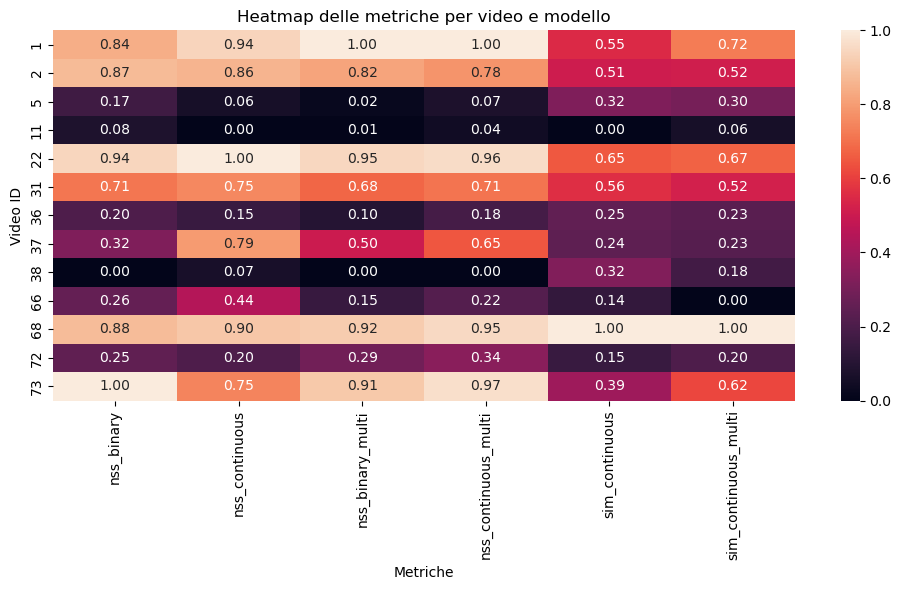

In [72]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_minmax, annot=True, fmt=".2f")
plt.title("Heatmap delle metriche per video e modello")
plt.ylabel("Video ID")
plt.xlabel("Metriche")
plt.tight_layout()
plt.show()

#### note heatmap:
#### Dal grafico si nota che i video 38,11 e 5 sono tra i più difficili rispetto a NSS. L'11 e 66 rispettoa alla stima della forma (sim). L'11 è il più difficile sotto entrambi aspetti.  Il video più semplice sotto tutti gli aspetti è il 68. Sotto NSS 1 &2

### STATISTICHE VIDEO FACILI & DIFFICILI

In [6]:
from utils import utility_fun as uf

path_env_dict=uf.get_path_env()
GAZE_INPUT_POINT_DATA_PATH = path_env_dict["GAZE_INPUT_POINT_DATA_PATH"]
VIDEO_ID = 11
gaze_js_data=uf.read_json(path=os.path.join(GAZE_INPUT_POINT_DATA_PATH,str(VIDEO_ID)+'.json'))
FRAME_SHAPE = tuple(gaze_js_data['FRAME_HW'])
FRAME_CNT=gaze_js_data['FRAME_CNT'] 
FACE_CNT =gaze_js_data['FACES_CNT'] 
print(F'***stat video=>{VIDEO_ID}\n FRAME_CNT=>{FRAME_CNT}\n FACE_CNT=>{FACE_CNT}***')

***stat video=>11
 FRAME_CNT=>523
 FACE_CNT=>3***


### ESEMPI OUTPUT E LABEL  video facili e video difficili 

In [5]:
import os
import sys  
sys.path.append('./src')
from dataset import SalientDataset 
import torch  
import torchvision.transforms as transforms
from torchvision.transforms import InterpolationMode
from model import FixationPredictorV3
from utils import utility_fun as uf
import numpy as np 
import matplotlib.pyplot as plt
path_env_dict=uf.get_path_env()

In [10]:
NONISO_MULTI_TASK_CHECKPOINT = 'models/nonisotropic__continuous_binary/model_epoch_8_modelName_v3.pt'
NONISO_CONTINUOUS_CHECKPOINT = 'models/nonisotropic__continuous/model_epoch_13_modelName_v3.pt'
NONISO_BINARY_CHECKPOINT = 'models/nonisotropic__binary/model_epoch_1_modelName_v3.pt'

In [11]:
hard_video=[38,11] 
easy_video=[68,73]

In [12]:
TEST_DATA_PATH = path_env_dict['TEST_DATA_PATH']
FRAME_RESIZED_SHAPE = (224,224)
TRANSFORM_INPUT= transforms.Compose([
        transforms.Resize(FRAME_RESIZED_SHAPE),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
TRANSFORM_OUPUT = transforms.Compose([
             transforms.Resize(FRAME_RESIZED_SHAPE,interpolation=InterpolationMode.BILINEAR),
            transforms.ToTensor()])
TRANSFORM_BINARY_OUTPUT = transforms.Compose([
            transforms.ToTensor()])
test_data_paths=uf.read_json(path=os.path.join(TEST_DATA_PATH,'test'+'.json'))

In [13]:
fixation_model = FixationPredictorV3(is_multi_task=True)
checkpoint = torch.load( NONISO_MULTI_TASK_CHECKPOINT,map_location=torch.device('cpu'))
fixation_model.load_state_dict(checkpoint,strict=False)
fixation_model.eval()

FixationPredictorV3(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running

In [56]:
test_set_continuous=SalientDataset(source_path=TEST_DATA_PATH,dataset_mode='test',usecase='nonisotropic__continuous_binary',binary_target_transform=TRANSFORM_BINARY_OUTPUT,target_transform=TRANSFORM_OUPUT,transform =TRANSFORM_INPUT,video_id=73 )

In [57]:
id_sample = np.random.randint(0,len(test_set_continuous))
inputs, continuous_target, binary_target =test_set_continuous[id_sample]

In [58]:
def denormalize(img, mean, std):
    """ img: (C, H, W), values in normalized range """
    img = img.copy()
    for c in range(3):
        img[c] = img[c] * std[c] + mean[c]
    return np.clip(img, 0, 1)

In [59]:
#434 - per 68
input_img  = denormalize(inputs.cpu().numpy(), mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [60]:
print('id sample',id_sample,'inputs',input_img.shape,'continuous',continuous_target.shape,'binary target',binary_target.shape)

id sample 250 inputs (3, 224, 224) continuous torch.Size([1, 224, 224]) binary target torch.Size([1, 224, 224])


In [61]:
continuous_map_out, binary_map_out = fixation_model(inputs.reshape(1,*inputs.shape))

In [62]:
continuous_map_out_sig=torch.sigmoid(continuous_map_out).detach().numpy().reshape(FRAME_RESIZED_SHAPE)
binary_map_out_sig=torch.sigmoid(binary_map_out).detach().numpy().reshape(FRAME_RESIZED_SHAPE)

In [63]:
continuous_target=continuous_target.reshape(FRAME_RESIZED_SHAPE)
binary_target =binary_target.reshape(FRAME_RESIZED_SHAPE)

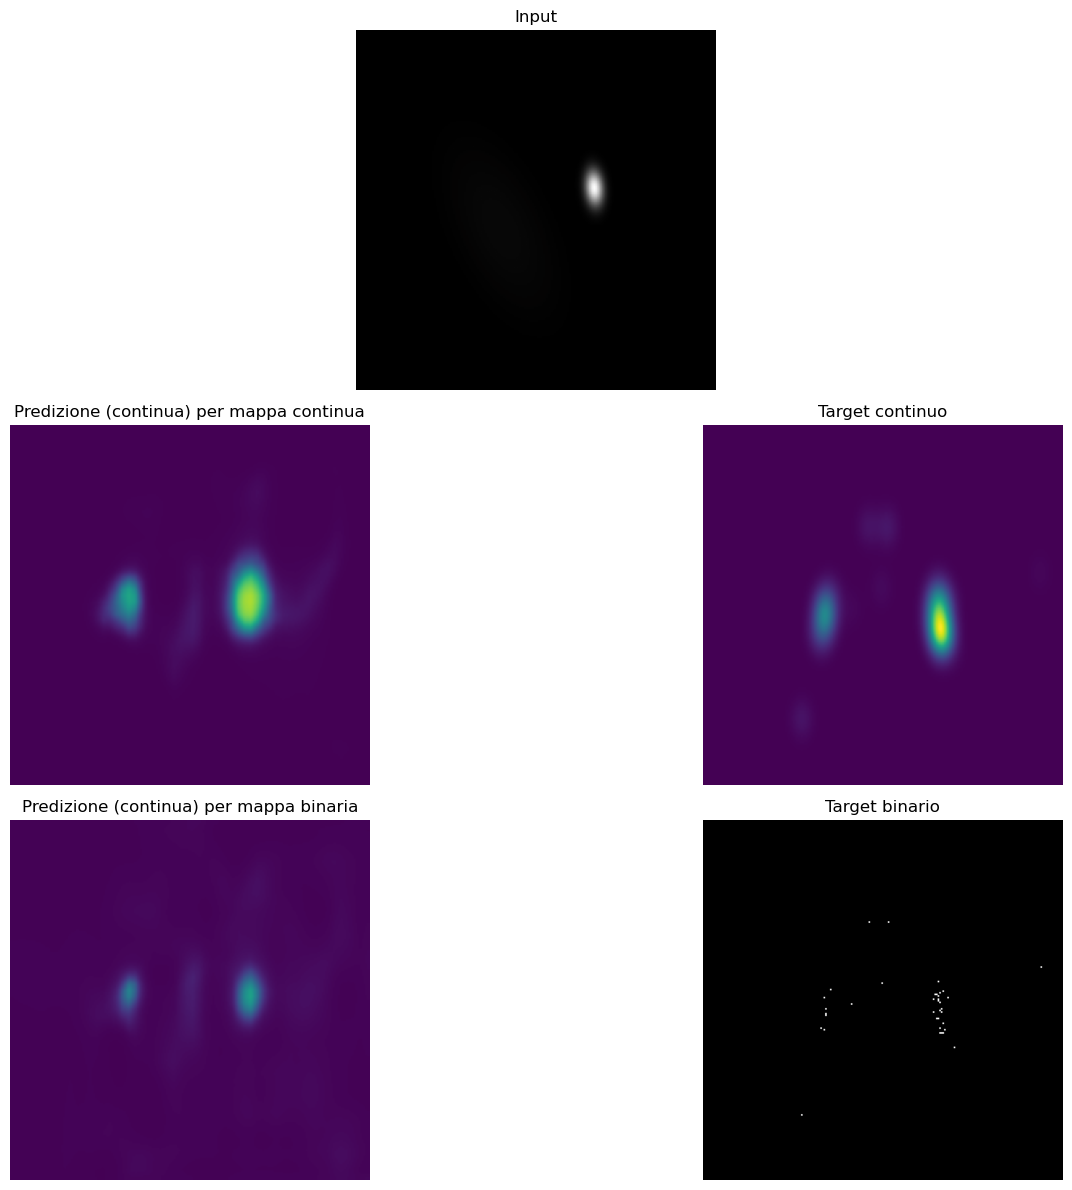

In [64]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

fig = plt.figure(figsize=(14, 12))

# Create a GridSpec with 3 rows, 2 columns
# Row 0 will span both columns
gs = GridSpec(3, 2, figure=fig)

# Top row: input image spanning all columns
ax_input = fig.add_subplot(gs[0, :])
ax_input.imshow((input_img.transpose(1, 2, 0)), cmap='gray', vmin=0, vmax=1)
ax_input.set_title("Input")
ax_input.axis('off')

# Row 1: prediction vs target (continuous)
ax_c_pred = fig.add_subplot(gs[1, 0])
ax_c_pred.imshow(continuous_map_out_sig, cmap='viridis', vmin=0, vmax=1)
ax_c_pred.set_title("Predizione (continua) per mappa continua")
ax_c_pred.axis('off')

ax_c_tgt = fig.add_subplot(gs[1, 1])
ax_c_tgt.imshow(continuous_target, cmap='viridis', vmin=0, vmax=1)
ax_c_tgt.set_title("Target continuo")
ax_c_tgt.axis('off')

# Row 2: prediction vs target (binary)
ax_b_pred = fig.add_subplot(gs[2, 0])
ax_b_pred.imshow(binary_map_out_sig, cmap='viridis', vmin=0, vmax=1)
ax_b_pred.set_title("Predizione (continua) per mappa binaria")
ax_b_pred.axis('off')

ax_b_tgt = fig.add_subplot(gs[2, 1])
ax_b_tgt.imshow(binary_target, cmap='gray', vmin=0, vmax=1)
ax_b_tgt.set_title("Target binario")
ax_b_tgt.axis('off')

plt.tight_layout()
plt.show()


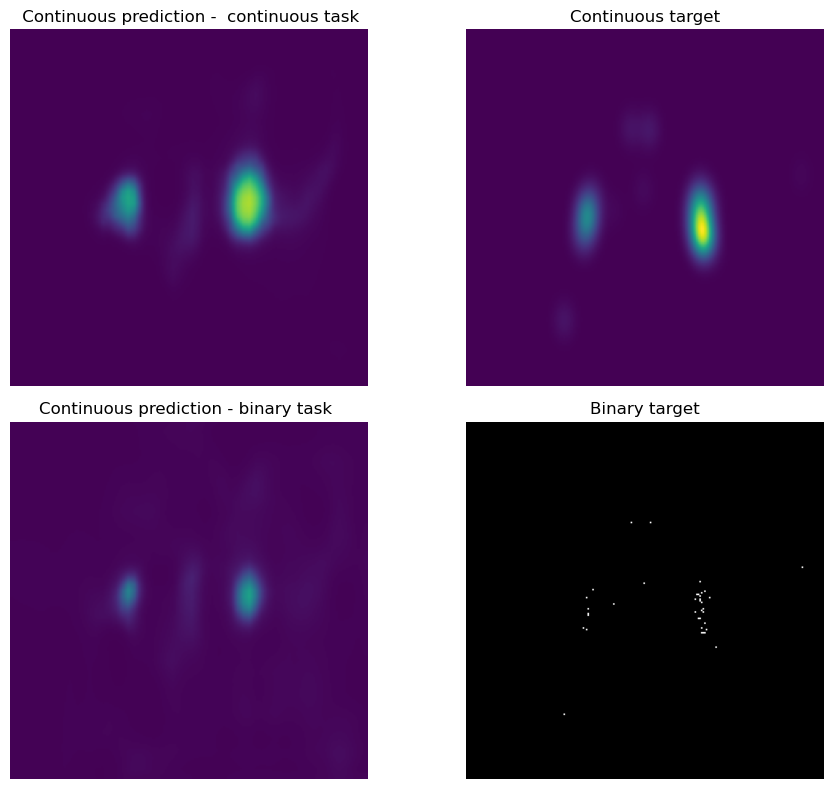

In [66]:

fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Prima riga: predizione vs target continuo
axs[0, 0].imshow(continuous_map_out_sig, cmap='viridis', vmin=0, vmax=1)
axs[0, 0].set_title(" Continuous prediction -  continuous task")
axs[0, 0].axis('off')

axs[0, 1].imshow(continuous_target, cmap='viridis', vmin=0, vmax=1)
axs[0, 1].set_title("Continuous target")
axs[0, 1].axis('off')

# Seconda riga: predizione vs target binario
axs[1, 0].imshow(binary_map_out_sig, cmap='viridis', vmin=0, vmax=1)
axs[1, 0].set_title("Continuous prediction - binary task ")
axs[1, 0].axis('off')

axs[1, 1].imshow(binary_target, cmap='gray', vmin=0, vmax=1)
axs[1, 1].set_title("Binary target")
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()


### check variability 

In [77]:
import numpy as np

def spatial_variability(binary_image):
    y_coords, x_coords = np.where(binary_image == 1)
    #nessuna variabilità
    if len(x_coords) == 0:
        return 0.0  
    
    # Compute standard deviations
    std_x = np.std(x_coords)
    std_y = np.std(y_coords)
    
    variability = np.sqrt(std_x**2 + std_y**2)
    
    return variability


In [81]:
variability_hard={'36':[],'11':[],'5':[],'38':[]}
variability_easy={'68':[],'1':[],'2':[],'73':[]}
variability_per_mode ={'easy': variability_easy, 'hard':variability_hard}
for mode_ in variability_per_mode:  
    for video_id_ in variability_per_mode[mode_]:
        print(video_id_)
        for  idx in range(100):
            test_set_continuous=SalientDataset(source_path=TEST_DATA_PATH,dataset_mode='test',usecase='nonisotropic__continuous_binary',binary_target_transform=TRANSFORM_BINARY_OUTPUT,target_transform=TRANSFORM_OUPUT,transform =TRANSFORM_INPUT,video_id=video_id_ )
            id_sample = np.random.randint(0,len(test_set_continuous))
            inputs, continuous_target, binary_target =test_set_continuous[id_sample] 
            variability_factor=float(spatial_variability(binary_target.squeeze(0).cpu().numpy()))
            variability_per_mode[mode_][video_id_].append(variability_factor)

68
1
2
73
36
11
5
38


In [83]:
var_out={'easy':[], 'hard':[]}
for mode_ in variability_per_mode:  
    for video_id_ in variability_per_mode[mode_]:
        var_out[mode_].append(np.mean(variability_per_mode[mode_][video_id_]))
pd.DataFrame(var_out).median()

In [85]:
pd.DataFrame(var_out).median()

easy    41.188463
hard    51.884976
dtype: float64

In [ ]:
binary_target.cpu().numpy().shape

In [32]:
#stat test
from scipy.stats import shapiro,ttest_rel

### verifichiamo normalità con Shapiro-Wilk 
#### nb: H₀: I dati sono distribuiti secondo una distribuzione normale

#### task mappa binario come target, singolo vs multi

In [24]:
diff = eval_score_df.loc[:,['nss_binary']].values.flatten() - eval_score_df.loc[:,['nss_binary_multi']].values.flatten()
# Verifica normalità delle differenze
stat, p = shapiro(diff)
print(f"shaprito stat {stat} - Shapiro-Wilk p-value: {p:.4f} Gruppo di dati task binario sono distributi normalmente:  {p>=0.05} ")

shaprito stat 0.9343561280688152 - Shapiro-Wilk p-value: 0.3881 Gruppo di dati task binario sono distributi normalmente:  True 


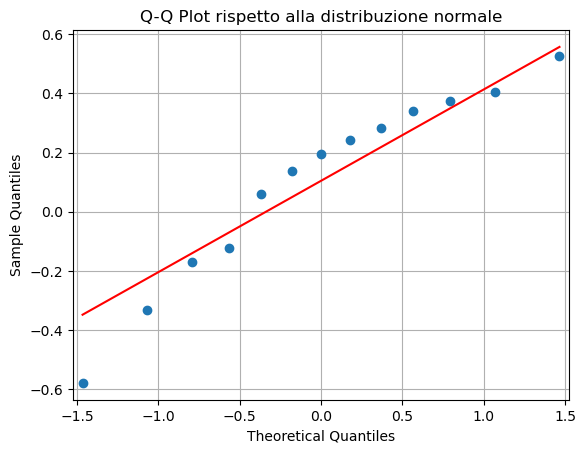

In [25]:
import statsmodels.api as sm
sm.qqplot(diff, line='s')
plt.title("Q-Q Plot rispetto alla distribuzione normale")
plt.grid(True)
plt.show()

#### task mappa continua come target, singolo vs multi - metrica NSS

In [26]:
diff = eval_score_df.loc[:,['nss_continuous']].values.flatten() - eval_score_df.loc[:,['nss_continuous_multi']].values.flatten()
# Verifica normalità delle differenze
stat, p = shapiro(diff)
print(f"shaprito stat {stat} - Shapiro-Wilk p-value: {p:.4f} Gruppo di dati task continuo wrt NSS sono distributi normalmente:  {p>=0.05} ")

shaprito stat 0.9782499038191202 - Shapiro-Wilk p-value: 0.9699 Gruppo di dati task continuo wrt NSS sono distributi normalmente:  True 


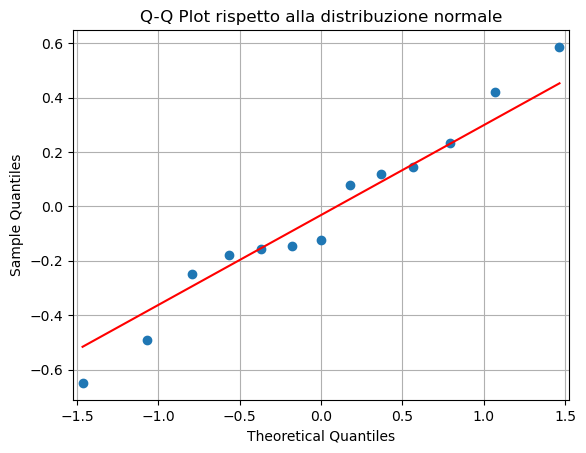

In [27]:
sm.qqplot(diff, line='s')
plt.title("Q-Q Plot rispetto alla distribuzione normale")
plt.grid(True)
plt.show()

#### task mappa continua come target, singolo vs multi - metrica SIM

In [28]:
diff = eval_score_df.loc[:,['sim_continuous']].values.flatten() - eval_score_df.loc[:,['sim_continuous_multi']].values.flatten()
# Verifica normalità delle differenze
stat, p = shapiro(diff)
print(f"shaprito stat {stat} - Shapiro-Wilk p-value: {p:.4f} Gruppo di dati task continuo wrt SIM sono distributi normalmente:  {p>=0.05} ")

shaprito stat 0.9476646526057297 - Shapiro-Wilk p-value: 0.5634 Gruppo di dati task continuo wrt SIM sono distributi normalmente:  True 


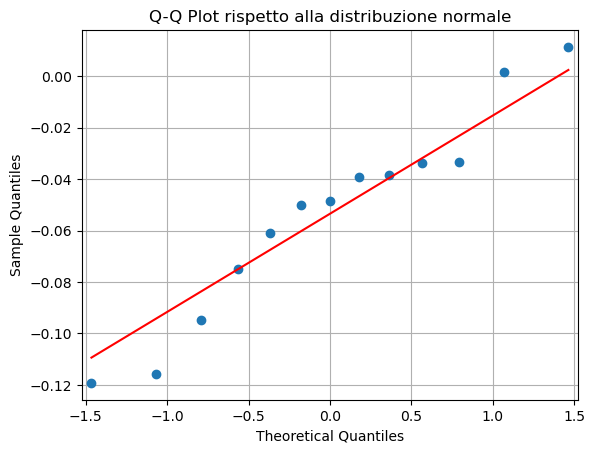

In [29]:
sm.qqplot(diff, line='s')
plt.title("Q-Q Plot rispetto alla distribuzione normale")
plt.grid(True)
plt.show()

In [10]:
for col in eval_score_df.columns:
    stat, p = shapiro(eval_score_df[col])
    print(f"{col} - Shapiro-Wilk p-value: {p:.4f} Gruppo di dati distributi normalmente:  {p>=0.05} ")

video_id - Shapiro-Wilk p-value: 0.1058 Gruppo di dati distributi normalmente:  True 
nss_binary - Shapiro-Wilk p-value: 0.0400 Gruppo di dati distributi normalmente:  False 
nss_continuous - Shapiro-Wilk p-value: 0.0333 Gruppo di dati distributi normalmente:  False 
nss_binary_multi - Shapiro-Wilk p-value: 0.0316 Gruppo di dati distributi normalmente:  False 
nss_continuous_multi - Shapiro-Wilk p-value: 0.0462 Gruppo di dati distributi normalmente:  False 
sim_continuous - Shapiro-Wilk p-value: 0.6311 Gruppo di dati distributi normalmente:  True 
sim_continuous_multi - Shapiro-Wilk p-value: 0.5319 Gruppo di dati distributi normalmente:  True 


### t-test dati appaiati per task mappa binario come target, singolo vs multi NSS metrica
##### nota: h0:  la media delle differenze tra le coppie è zero 

In [34]:
X = eval_score_df.loc[:,['nss_binary']].values.flatten() 
Y = eval_score_df.loc[:,['nss_binary_multi']].values.flatten()
stat, p = ttest_rel(X, Y)
print(f"T-test appaiato: stat = {stat:.4f}, p-value = {p:.4f}. Non c'è differenza tra modelli?=> {p>=0.05} ")
#non cè differenza significativa, però essendo pochi dati controlliamo anche l'effect size per capire se c'è un effetto moderato o meno (magnitudo effetto
#e non variabilità rispetto al test-t)

T-test appaiato: stat = 1.1725, p-value = 0.2637. Non c'è differenza tra modelli?=> True 


In [35]:
# Cohen's d
cohen_d = (X-Y).mean() / (X-Y).std(ddof=1)
print(f"Cohen's d: {cohen_d:.3f}")
#effect size di 0.325 quindi circa debole-moderato che potrebbe avere rilevanza pratica in contesti specifici.

Cohen's d: 0.325


### t-test dati appaiati per task mappa continua come target, singolo vs multi WRT NSS metrica
##### nota: h0:  la media delle differenze tra le coppie è zero

In [37]:
X = eval_score_df.loc[:,['nss_continuous']].values.flatten() 
Y = eval_score_df.loc[:,['nss_continuous_multi']].values.flatten()
stat, p = ttest_rel(X, Y)
print(f"T-test appaiato: stat = {stat:.4f}, p-value = {p:.4f}. Non c'è differenza tra modelli?=> {p>=0.05} ")
#non cè differenza significativa, però essendo pochi dati controlliamo anche l'effect size per capire se c'è un effetto moderato o meno (magnitudo effetto
#e non variabilità rispetto al test-t)

T-test appaiato: stat = -0.3355, p-value = 0.7430. Non c'è differenza tra modelli?=> True 


In [38]:
cohen_d = (X-Y).mean() / (X-Y).std(ddof=1)
print(f"Cohen's d: {cohen_d:.3f}")
#effetto praticamente nullo

Cohen's d: -0.093


### t-test dati appaiati per task mappa continua come target, singolo vs multi WRT SIM metrica
##### nota: h0:  la media delle differenze tra le coppie è zero

In [39]:
X = eval_score_df.loc[:,['sim_continuous']].values.flatten() 
Y = eval_score_df.loc[:,['sim_continuous_multi']].values.flatten()
stat, p = ttest_rel(X, Y)
print(f"T-test appaiato: stat = {stat:.4f}, p-value = {p:.4f}. Non c'è differenza tra modelli?=> {p>=0.05} ")
#Modello Y (multi) medimanete migliore sul SIM

T-test appaiato: stat = -4.8581, p-value = 0.0004. Non c'è differenza tra modelli?=> False 


In [40]:
cohen_d = (X-Y).mean() / (X-Y).std(ddof=1)
print(f"Cohen's d: {cohen_d:.3f}")
#effetto molto forte  (il multi in questo caso mediamente ha dei valori più alti)

Cohen's d: -1.347
